In [1]:
# 미리 정해진 개수의 모형을 사용하지 않고
# 하나의 모형에서 시작하여 개별 모형을 하나씩 추가하는 방법
# 다수결 방법이 아닌 개별 모형의 출력에 가중치를 조합한 값을 판별함수로 사용

#pima indian 당뇨병 데이터셋
#https://www.kaggle.com/jitenderranga/diabetes-detection

# csv 파일을 로딩

import pandas as pd

df = pd.read_csv("c:/workspace3/data/pima_data.csv")
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df["outcome"].value_counts()

outcome
0    500
1    268
Name: count, dtype: int64

In [3]:
train_cols = df.columns[0:8]

X = df[train_cols] # 독립변수
y = df["outcome"]

In [4]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['outcome'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

df_samp["outcome"].value_counts()

outcome
0    268
1    268
Name: count, dtype: int64

In [5]:
X = df_samp[train_cols] # 독립변수
y = df_samp["outcome"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [7]:
# base_estimator : 부스트 앙상블이 만들어지는 기본 분류모형,
#  기본값 DecisionTreeClassifier (max_depth = 1)
# n_estimators : 기본값 = 50, 부스팅이 종료되는 최대 추정량(조기 종료)
# learning_rate : 기본값 = 1, 학습진행 속도

#에이다부스트(adaboost) : adaptive boost(적응형 부스트)
#  학습 데이터에 가중치를 주고 분류 모형이 틀리게 예측한 데이터의 가중치를 합한 값을 손실함수로 사용하고
#  손실함수를 최소화하는 모형을 선택하는 알고리즘

from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
model_ada.fit(X_train, y_train)

print(model_ada.predict(X_test))
print(model_ada.score(X_train, y_train))
print(model_ada.score(X_test, y_test))

[0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1]
0.8761682242990654
0.6944444444444444


In [8]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)

import numpy as np
import matplotlib.pyplot as plt

def plot_tree(model):
    n_features = X.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.ylim(-1, n_features)

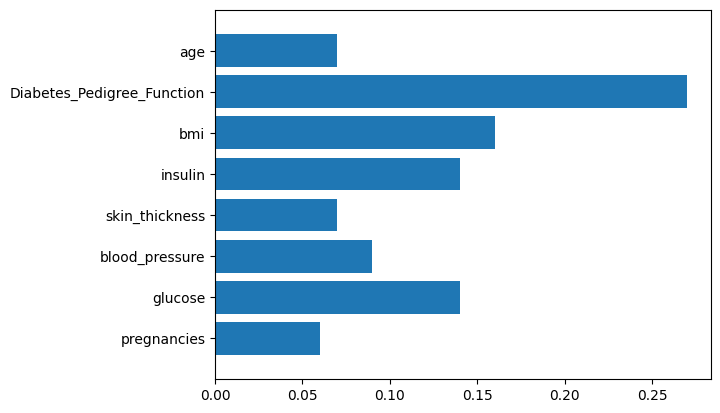

In [9]:
plot_tree(model_ada)  

In [10]:
#algorithm : SAMME, SAMME.R(default = 'SAMME.R')
#SAMME.R : SAMME보다 빠르게 수렴되므로 부스팅 반복 횟수가 줄어 테스트 오류가 감소

from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')
model_svc = AdaBoostClassifier(algorithm='SAMME',n_estimators=50, base_estimator=svc)
model_svc.fit(X_train, y_train)

print(model_svc.predict(X_test))
print(model_svc.score(X_train, y_train))
print(model_svc.score(X_test, y_test))

c:\Python3.9.13\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1]
0.7429906542056075
0.6851851851851852


[0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1]
0.9228971962616822
0.75


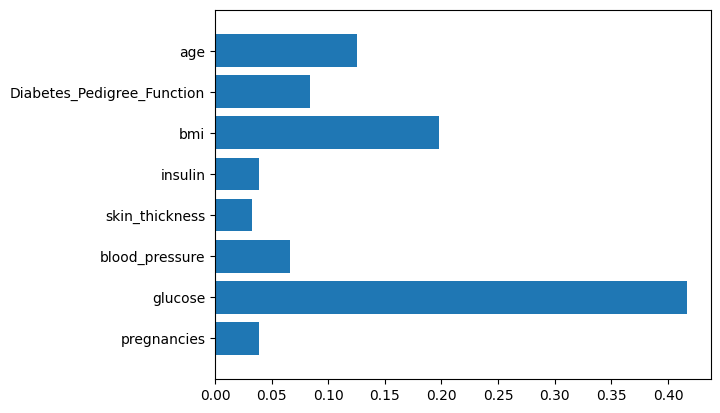

In [11]:
#그레디언트 부스트: 손실을 최소화하는 개별 분류함수를 찾는 알고리즘
#  내부적으로 의사결정 회귀나무 모형을 사용함

from sklearn.ensemble import GradientBoostingClassifier

model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=0)
model_grad.fit(X_train, y_train)

print(model_grad.predict(X_test))
print(model_grad.score(X_train, y_train))
print(model_grad.score(X_test, y_test))

plot_tree(model_grad)

[0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1]
0.9976635514018691
0.75


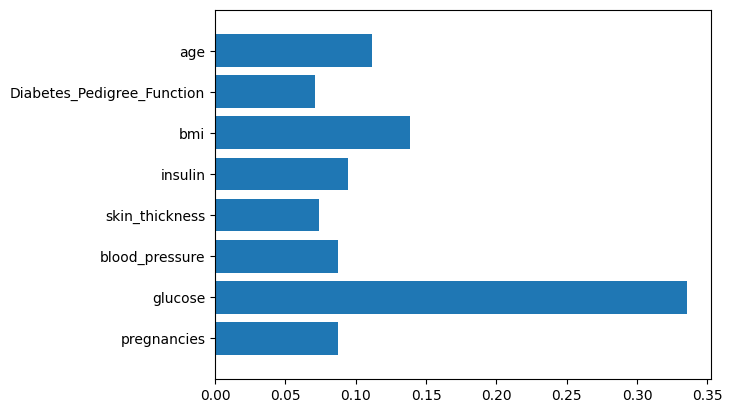

In [12]:
#XGBoost : 그레디언트 부스트 알고리즘을 분산환경에서도 실행할 수 있도록 구현된 라이브러리
#  성능이 우수하고 자원 활용률이 좋아서 최근 많이 사용되고 있는 알고리즘
#pip install xgboost

import xgboost

model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=3, random_state=0)
model_xgb.fit(X_train, y_train)

print(model_xgb.predict(X_test))
print(model_xgb.score(X_train, y_train))
print(model_xgb.score(X_test, y_test))

plot_tree(model_xgb)

[LightGBM] [Info] Number of positive: 214, number of negative: 214
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 534
[LightGBM] [Info] Number of data points in the train set: 428, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

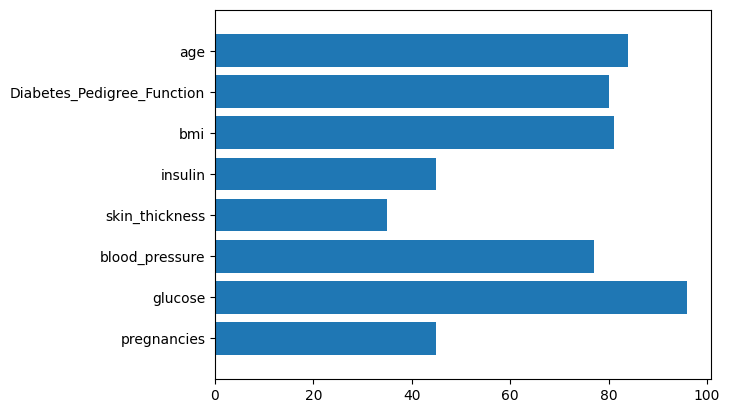

In [13]:
#GOSS(Gradient-based One-Side Sampling)을 통해 데이터의 일부만으로 빠르게 정보이득을 계산하고
#EFM(Exclusive Feature Bundling)을 통해 Feature를 획기적으로 감소시켜서
#XGBoost보다 더 좋은 성능을 나타내는 알고리즘
#정보이득(어떤 속성을 선택함으로 인하여 데이터를 더 잘 구분하게 되는 특성)
#범주형 변수를 원핫인코딩을 하게 되면 변수가 많이 늘어나서 계산이 오래 걸리는 상황이 발생하는데
#lightgbm 알고리즘은 이 문제를 잘 극복할 수 있는 알고리즘

#pip install lightgbm
import lightgbm

model_lgbm = lightgbm.LGBMClassifier(n_estimators=100, max_depth=3, random_state=0)
model_lgbm.fit(X_train, y_train)

print(model_lgbm.predict(X_test))
print(model_lgbm.score(X_train, y_train))
print(model_lgbm.score(X_test, y_test))

plot_tree(model_lgbm)